# **Importing Libraries** 

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [80]:
import itertools


# Reading the Data

In [81]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [82]:
df = pd.read_csv("/content/drive/MyDrive/heart.csv")

In [83]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# **Data Cleaning and Data Preparation**

In [84]:
for column in df.columns:
    num_of_distinct_values = len(df[column].unique())
    print(f"{column}: {num_of_distinct_values} distinct values")

age: 41 distinct values
sex: 2 distinct values
cp: 4 distinct values
trtbps: 49 distinct values
chol: 152 distinct values
fbs: 2 distinct values
restecg: 3 distinct values
thalachh: 91 distinct values
exng: 2 distinct values
oldpeak: 40 distinct values
slp: 3 distinct values
caa: 5 distinct values
thall: 4 distinct values
output: 2 distinct values


In [85]:
duplicate_rows = df[df.duplicated()]
print("Number of duplicate rows: ", duplicate_rows.shape)

Number of duplicate rows:  (1, 14)


In [86]:
df = df.drop_duplicates()

In [87]:
data_na = (df.isnull().sum() / len(df)) * 100
data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :data_na})
missing_data.head(20)

,Missing Ratio


In [88]:
df['thall'] = df['thall'].replace(0, 2)

In [89]:
cp_mapping = {0: 'typical angina',
              1: 'atypical angina',
              2: 'non-anginal pain',
              3: 'asymptomatic'}
df['cp'] = df['cp'].map(cp_mapping)

slp_mapping = {0: 'unsloping',
               1: 'flat',
               2: 'downsloping'}
df['slp'] = df['slp'].map(slp_mapping)

thall_mapping = {1: 'fixed defect',
                 2: 'normal',
                 3: 'reversible defect'}
df['thall'] = df['thall'].map(thall_mapping)

rest_ecg_mapping = {0: 'normal',
                    1: 'ST-T wave abnormality',
                    2: 'left ventricular hypertrophy'}
df['restecg'] = df['restecg'].map(rest_ecg_mapping)

sex_mapping = {1: 'male',
               0: 'female'}
df['sex'] = df['sex'].map(sex_mapping)

# **Univariate Analysis**

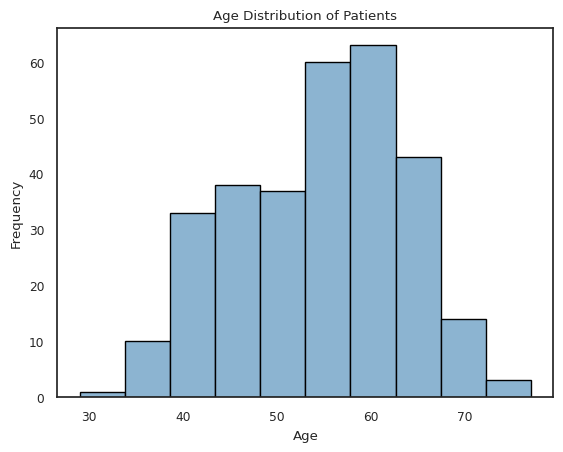

In [90]:
plt.hist(df['age'], bins=10, edgecolor='black')
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

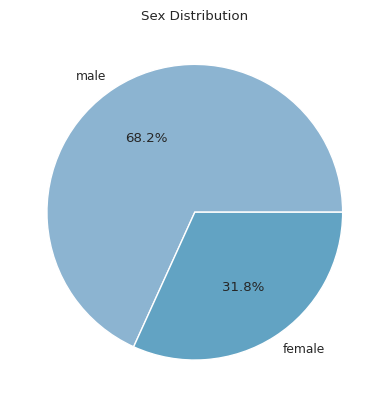

In [91]:
sex_count = df['sex'].value_counts()
plt.pie(sex_count, labels=sex_count.index, autopct='%1.1f%%')
plt.title('Sex Distribution')
plt.show()

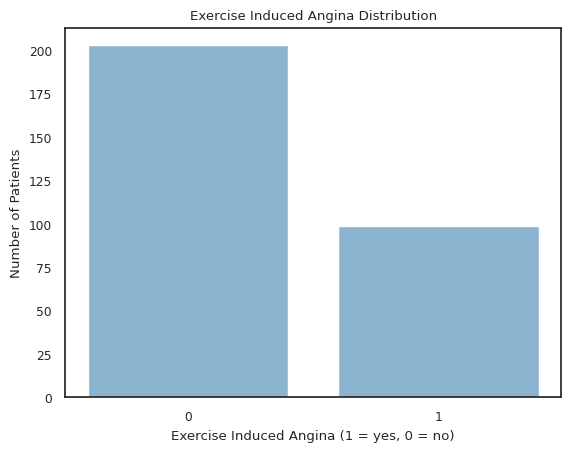

In [92]:
exang_count = df['exng'].value_counts()
plt.bar(exang_count.index, exang_count.values)
plt.title('Exercise Induced Angina Distribution')
plt.xlabel('Exercise Induced Angina (1 = yes, 0 = no)')
plt.ylabel('Number of Patients')
plt.xticks(exang_count.index)
plt.show()

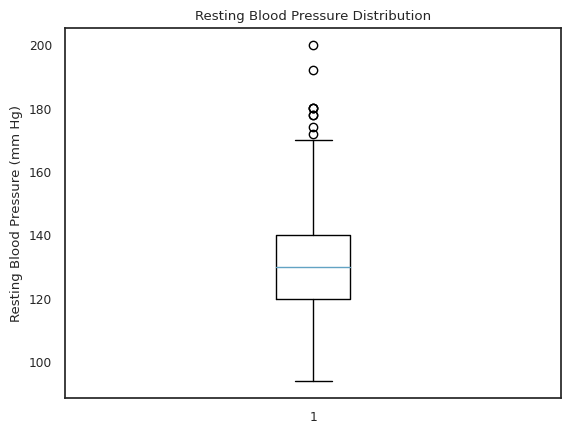

In [93]:
plt.boxplot(df['trtbps'])
plt.title('Resting Blood Pressure Distribution')
plt.ylabel('Resting Blood Pressure (mm Hg)')
plt.show()

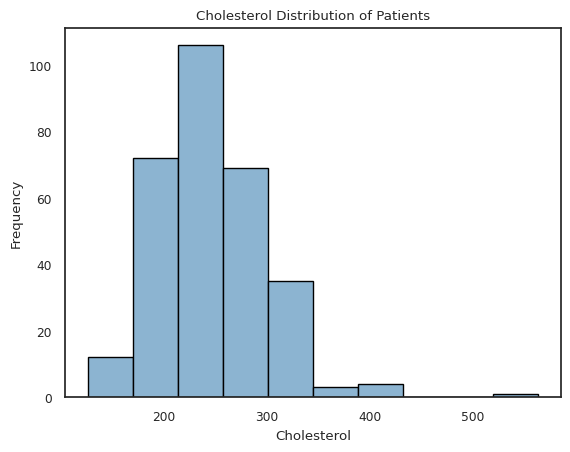

In [94]:
plt.hist(df['chol'], bins=10, edgecolor='black')
plt.title('Cholesterol Distribution of Patients')
plt.xlabel('Cholesterol')
plt.ylabel('Frequency')
plt.show()

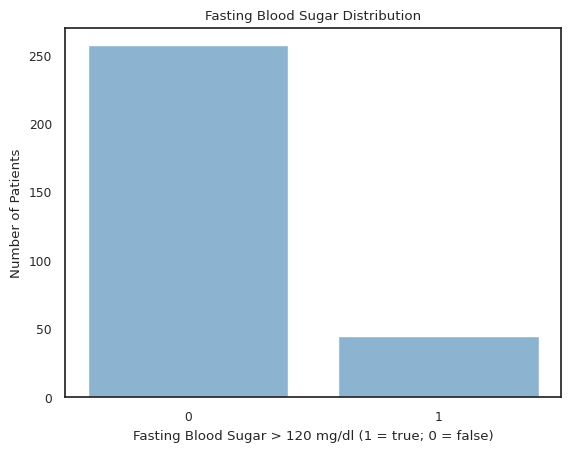

In [95]:
fbs_count = df['fbs'].value_counts()
plt.bar(fbs_count.index, fbs_count.values)
plt.title('Fasting Blood Sugar Distribution')
plt.xlabel('Fasting Blood Sugar > 120 mg/dl (1 = true; 0 = false)')
plt.ylabel('Number of Patients')
plt.xticks(fbs_count.index)
plt.show()

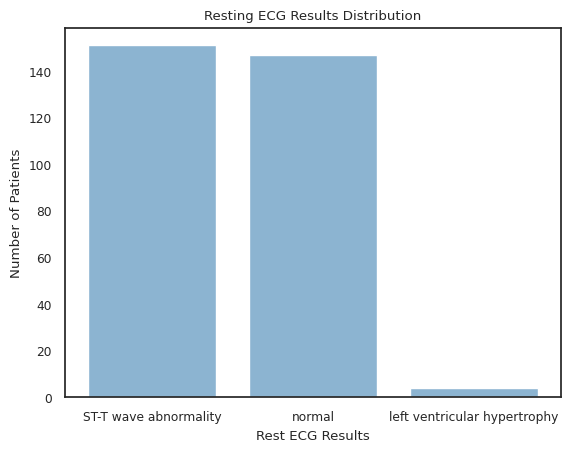

In [96]:
rest_ecg_count = df['restecg'].value_counts()
plt.bar(rest_ecg_count.index, rest_ecg_count.values)
plt.title('Resting ECG Results Distribution')
plt.xlabel('Rest ECG Results')
plt.ylabel('Number of Patients')
plt.xticks(rest_ecg_count.index)
plt.show()

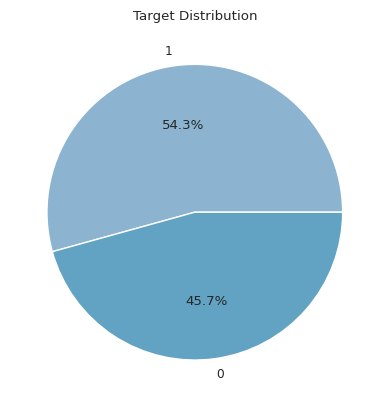

In [97]:
target_count = df['output'].value_counts()
plt.pie(target_count, labels=target_count.index, autopct='%1.1f%%')
plt.title('Target Distribution')
plt.show()

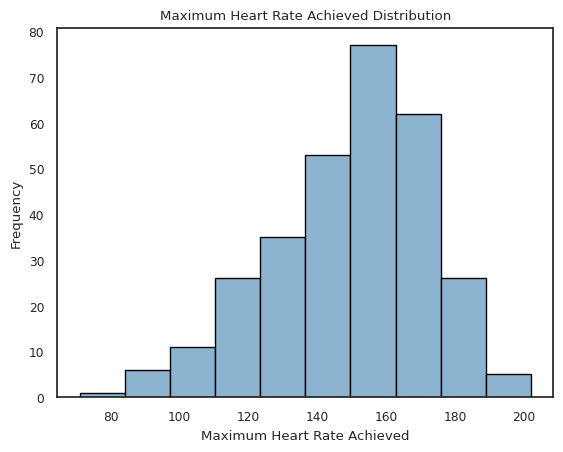

In [98]:
plt.hist(df['thalachh'], bins=10, edgecolor='black')
plt.title('Maximum Heart Rate Achieved Distribution')
plt.xlabel('Maximum Heart Rate Achieved')
plt.ylabel('Frequency')
plt.show()

# **Bivariate Analysis**

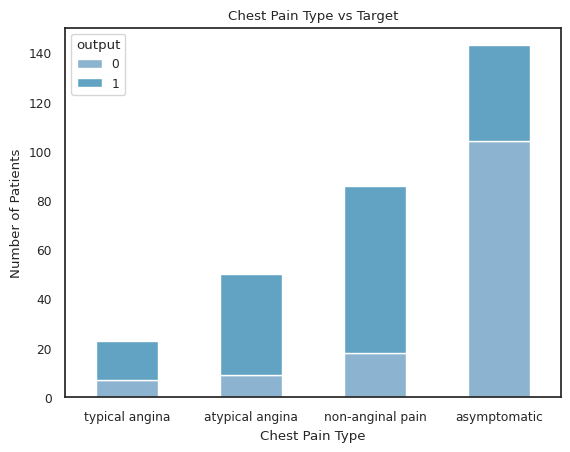

In [99]:
cp_target = df.groupby(['cp', 'output']).size().unstack().fillna(0)
cp_target.plot(kind='bar', stacked=True)
plt.title('Chest Pain Type vs Target')
plt.xlabel('Chest Pain Type')
plt.ylabel('Number of Patients')
plt.xticks(ticks=[0,1,2,3], labels=['typical angina', 'atypical angina', 'non-anginal pain', 'asymptomatic'], rotation=0)
plt.show()

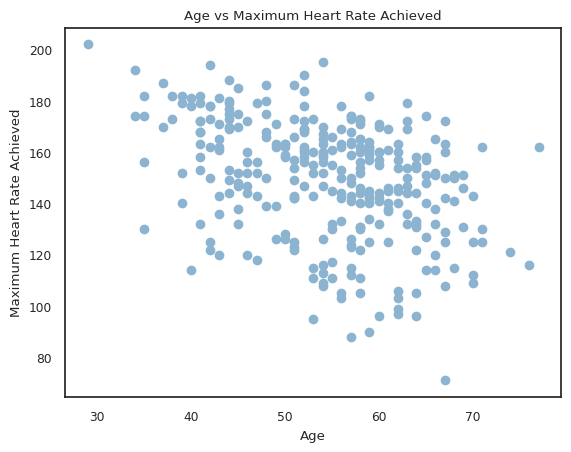

In [100]:
plt.scatter(df['age'], df['thalachh'])
plt.title('Age vs Maximum Heart Rate Achieved')
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate Achieved')
plt.show()

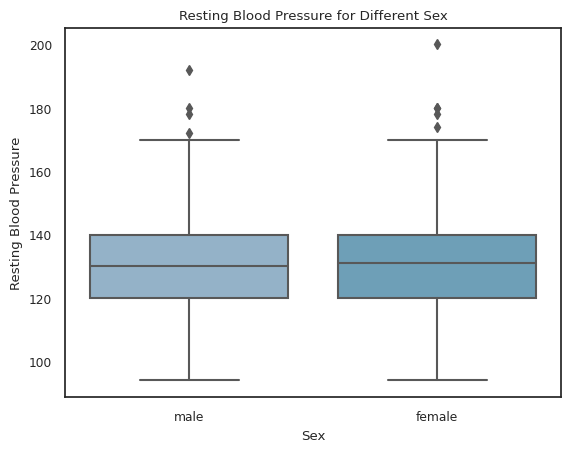

In [101]:
sns.boxplot(x='sex', y='trtbps', data=df)
plt.title('Resting Blood Pressure for Different Sex')
plt.xlabel('Sex')
plt.ylabel('Resting Blood Pressure')
plt.show()

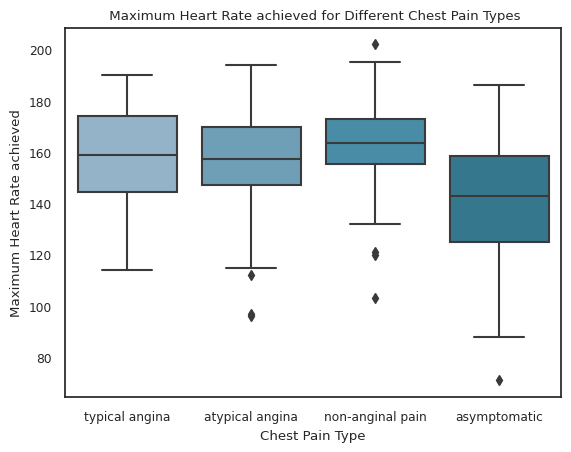

In [102]:
sns.boxplot(x='cp', y='thalachh', data=df)
plt.title(' Maximum Heart Rate achieved for Different Chest Pain Types')
plt.xlabel('Chest Pain Type')
plt.ylabel('Maximum Heart Rate achieved')
plt.xticks(ticks=[0,1,2,3], labels=['typical angina', 'atypical angina', 'non-anginal pain', 'asymptomatic'])
plt.show()

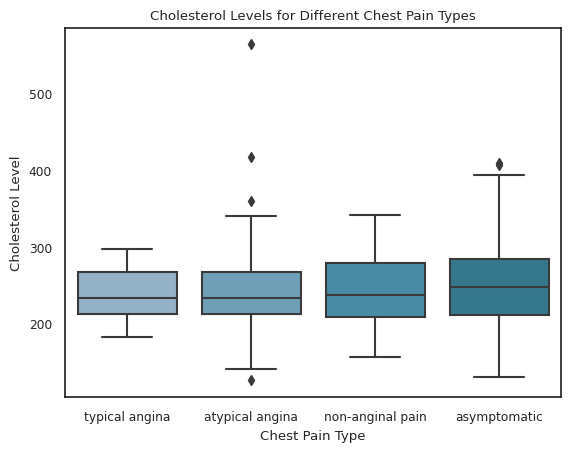

In [103]:
sns.boxplot(x='cp', y='chol', data=df)
plt.title('Cholesterol Levels for Different Chest Pain Types')
plt.xlabel('Chest Pain Type')
plt.ylabel('Cholesterol Level')
plt.xticks(ticks=[0,1,2,3], labels=['typical angina', 'atypical angina', 'non-anginal pain', 'asymptomatic'])
plt.show()

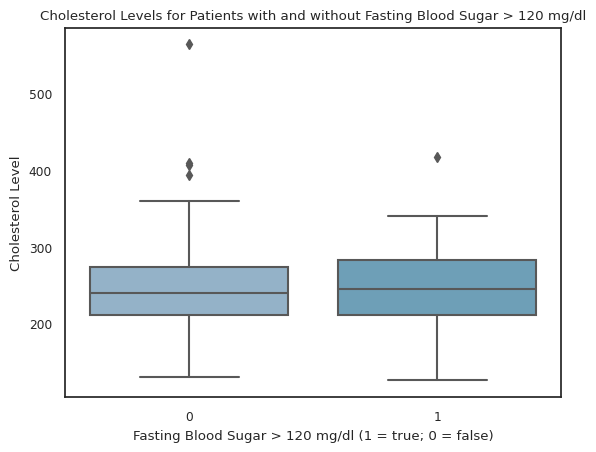

In [104]:
sns.boxplot(x='fbs', y='chol', data=df)
plt.title('Cholesterol Levels for Patients with and without Fasting Blood Sugar > 120 mg/dl')
plt.xlabel('Fasting Blood Sugar > 120 mg/dl (1 = true; 0 = false)')
plt.ylabel('Cholesterol Level')
plt.show()

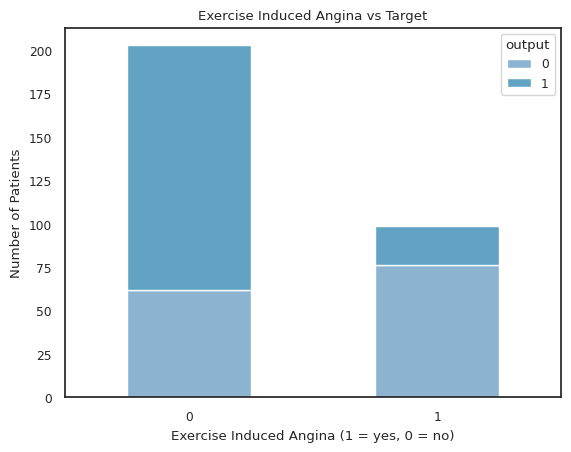

In [105]:
exang_target = df.groupby(['exng', 'output']).size().unstack().fillna(0)
exang_target.plot(kind='bar', stacked=True)
plt.title('Exercise Induced Angina vs Target')
plt.xlabel('Exercise Induced Angina (1 = yes, 0 = no)')
plt.ylabel('Number of Patients')
plt.xticks(rotation=0)
plt.show()

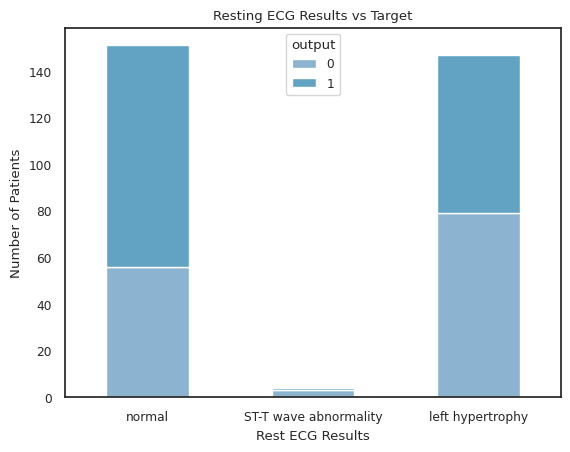

In [106]:
restecg_target = df.groupby(['restecg', 'output']).size().unstack().fillna(0)
restecg_target.plot(kind='bar', stacked=True)
plt.title('Resting ECG Results vs Target')
plt.xlabel('Rest ECG Results')
plt.ylabel('Number of Patients')
plt.xticks(ticks=[0,1,2], labels=['normal', 'ST-T wave abnormality', 'left hypertrophy'], rotation=0)
plt.show()

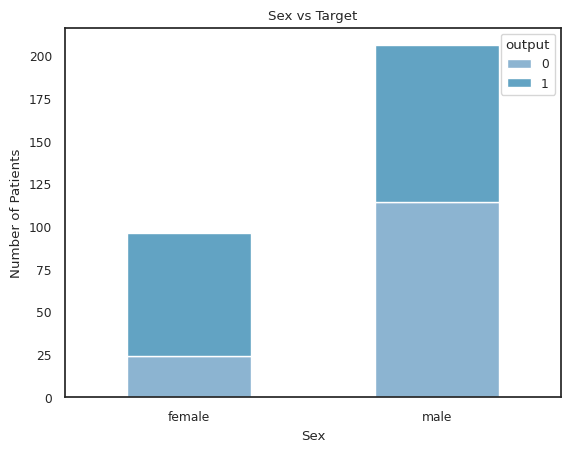

In [107]:
sex_target = df.groupby(['sex', 'output']).size().unstack().fillna(0)
sex_target.plot(kind='bar', stacked=True)
plt.title('Sex vs Target')
plt.xlabel('Sex')
plt.ylabel('Number of Patients')
plt.xticks(rotation=0)
plt.show()

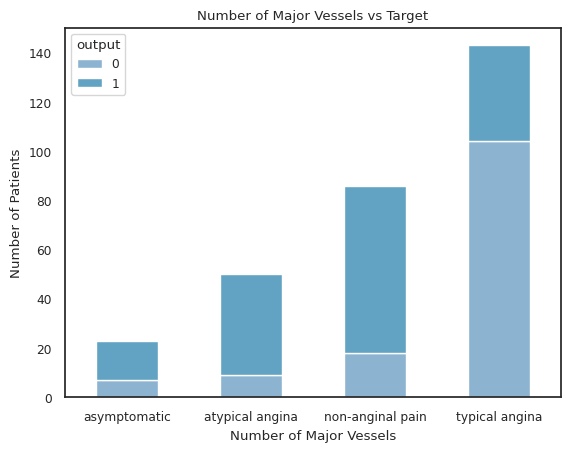

In [108]:
ca_target = df.groupby(['cp', 'output']).size().unstack().fillna(0)
ca_target.plot(kind='bar', stacked=True)
plt.title('Number of Major Vessels vs Target')
plt.xlabel('Number of Major Vessels')
plt.ylabel('Number of Patients')
plt.xticks(rotation=0)
plt.show()

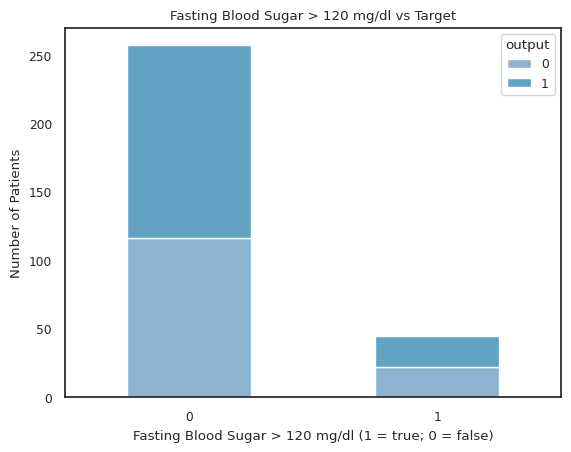

In [109]:
fbs_target = df.groupby(['fbs', 'output']).size().unstack().fillna(0)
fbs_target.plot(kind='bar', stacked=True)
plt.title('Fasting Blood Sugar > 120 mg/dl vs Target')
plt.xlabel('Fasting Blood Sugar > 120 mg/dl (1 = true; 0 = false)')
plt.ylabel('Number of Patients')
plt.xticks(rotation=0)
plt.show()

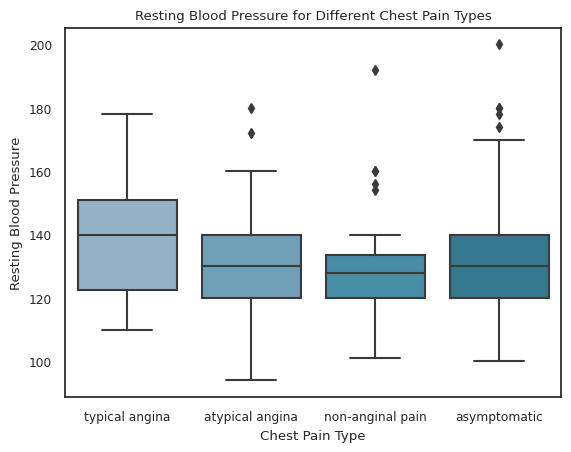

In [110]:
sns.boxplot(x='cp', y='trtbps', data=df)
plt.title('Resting Blood Pressure for Different Chest Pain Types')
plt.xlabel('Chest Pain Type')
plt.ylabel('Resting Blood Pressure')
plt.xticks(ticks=[0,1,2,3], labels=['typical angina', 'atypical angina', 'non-anginal pain', 'asymptomatic'])
plt.show()

# **Multivariate Analysis**

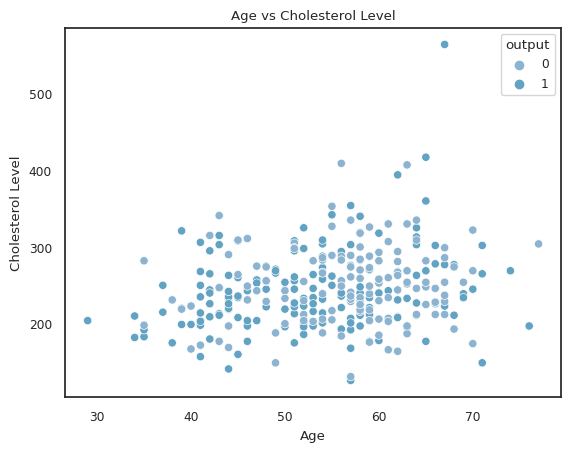

In [111]:
sns.scatterplot(x='age', y='chol', hue='output', data=df)
plt.title('Age vs Cholesterol Level')
plt.xlabel('Age')
plt.ylabel('Cholesterol Level')
plt.show()

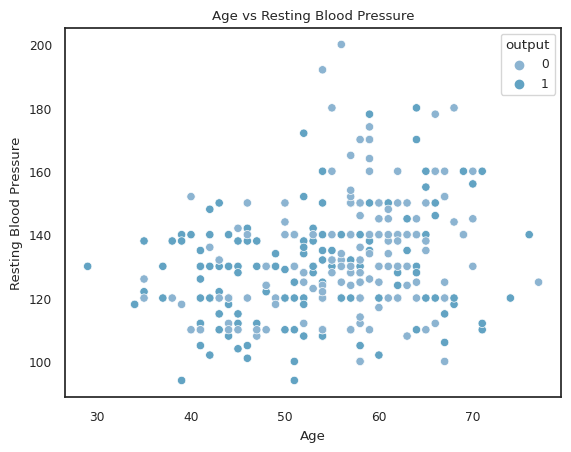

In [112]:
sns.scatterplot(x='age', y='trtbps', hue='output', data=df)
plt.title('Age vs Resting Blood Pressure')
plt.xlabel('Age')
plt.ylabel('Resting Blood Pressure')
plt.show()

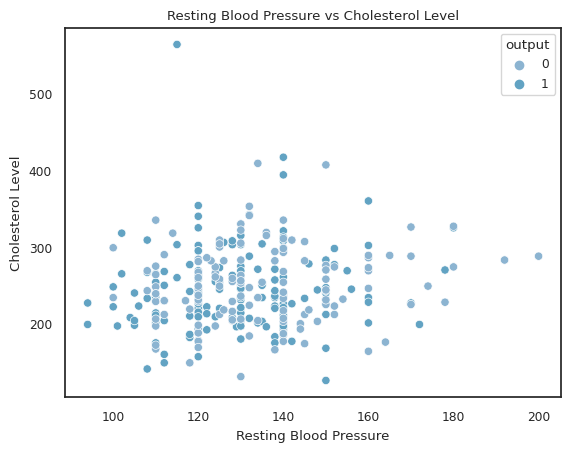

In [113]:
sns.scatterplot(x='trtbps', y='chol', hue='output', data=df)
plt.title('Resting Blood Pressure vs Cholesterol Level')
plt.xlabel('Resting Blood Pressure')
plt.ylabel('Cholesterol Level')
plt.show()

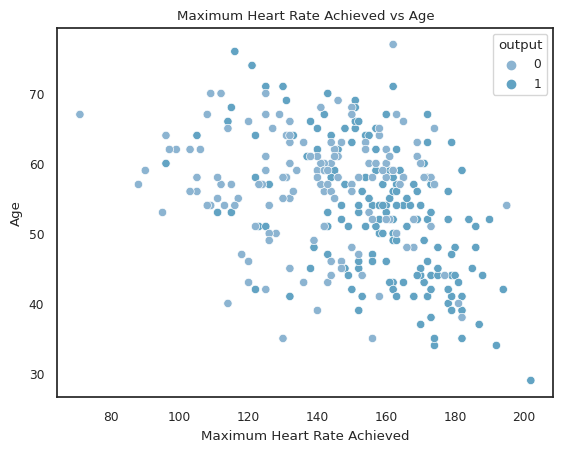

In [114]:
sns.scatterplot(x='thalachh', y='age', hue='output', data=df)
plt.title('Maximum Heart Rate Achieved vs Age')
plt.xlabel('Maximum Heart Rate Achieved')
plt.ylabel('Age')
plt.show()

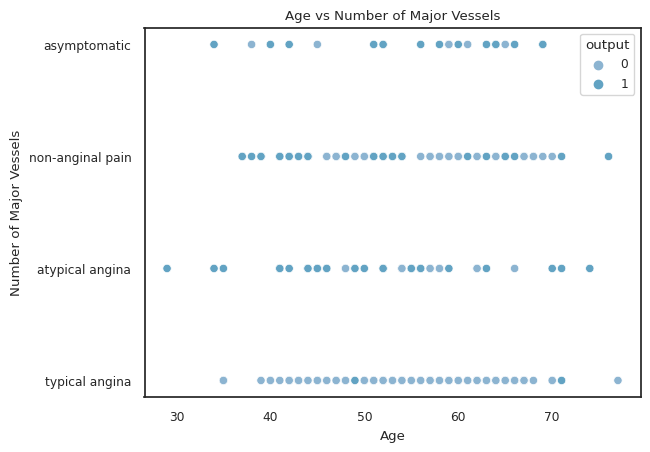

In [115]:
sns.scatterplot(x='age', y='cp', hue='output', data=df)
plt.title('Age vs Number of Major Vessels')
plt.xlabel('Age')
plt.ylabel('Number of Major Vessels')
plt.show()

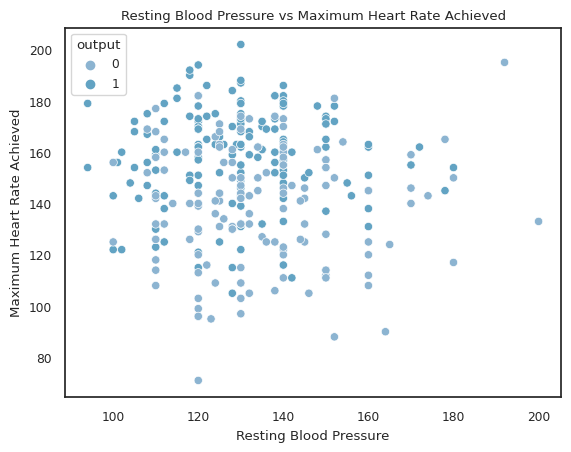

In [116]:
sns.scatterplot(x='trtbps', y='thalachh', hue='output', data=df)
plt.title('Resting Blood Pressure vs Maximum Heart Rate Achieved')
plt.xlabel('Resting Blood Pressure')
plt.ylabel('Maximum Heart Rate Achieved')
plt.show()

# Correlation

In [117]:
data = df.copy()
categorical_columns = ['sex','cp','restecg','slp','thall']
numerical_columns = ['age','trtbps','chol','fbs','thalachh','exng','oldpeak','caa','output']
dummy_variables = pd.get_dummies(data, columns=categorical_columns, drop_first=False)

### Preprocessing

In [118]:
scaler = StandardScaler()
scaled_numerical = scaler.fit_transform(data[numerical_columns])
scaled_numerical_df = pd.DataFrame(scaled_numerical, columns=numerical_columns)

In [119]:
# Drop the original numerical columns
dummy_variables = dummy_variables.drop(numerical_columns, axis=1)

# Concatenate the dummy variables and scaled numerical columns
processed_df = pd.concat([dummy_variables, scaled_numerical_df], axis=1)

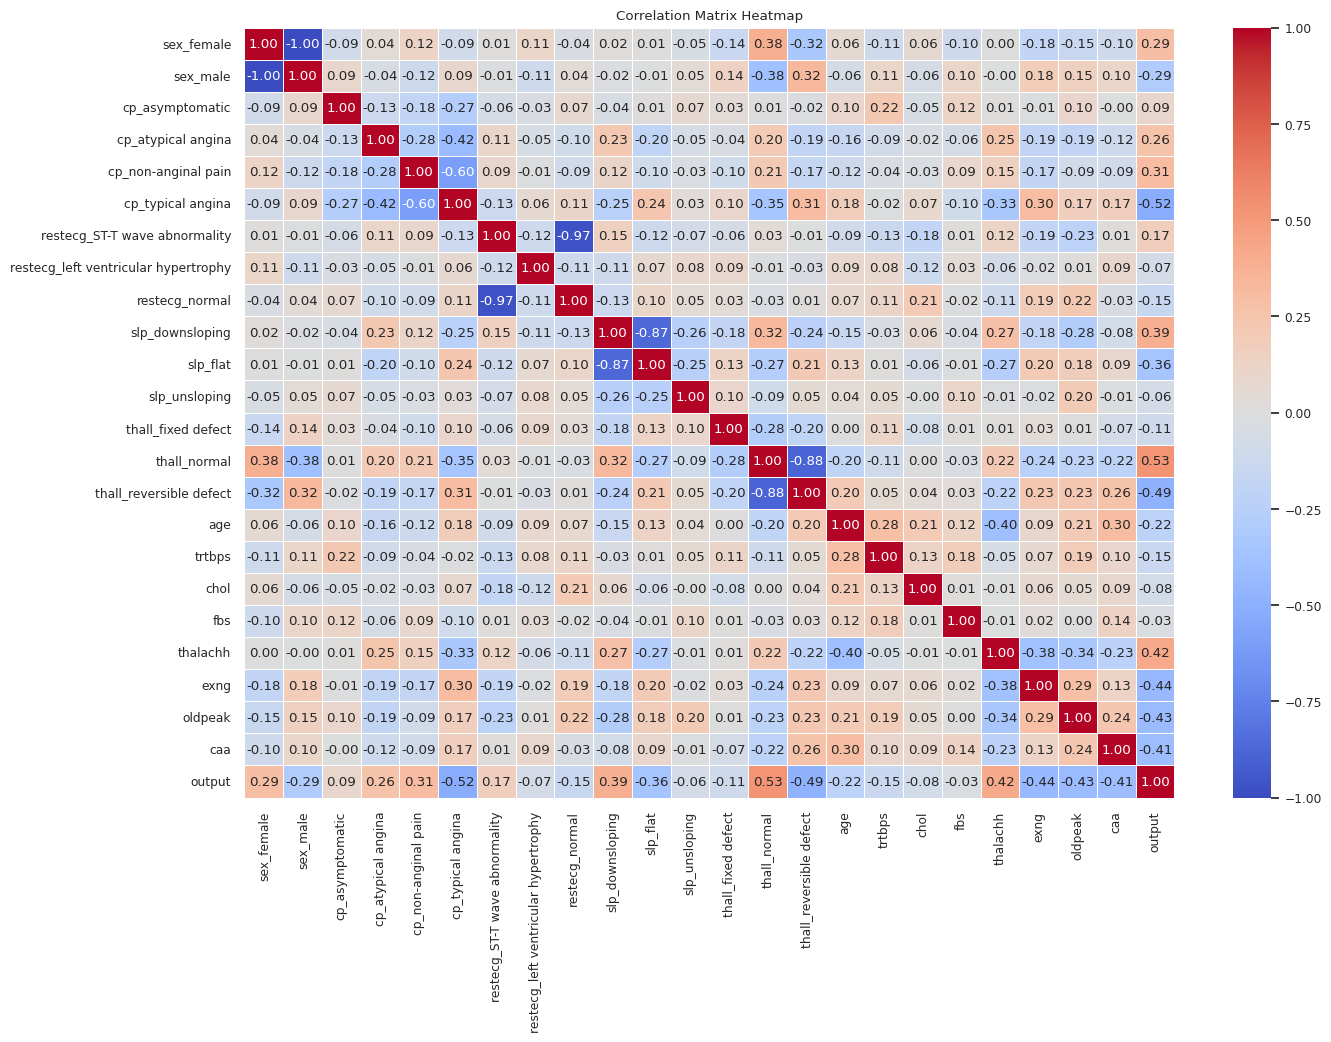

In [120]:
correlation_matrix = processed_df.corr()

#Graph I.
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()

corr = processed_df.corr()
target_corr = corr['output'].drop('output')

# Sort correlation values in descending order
target_corr_sorted = target_corr.sort_values(ascending=False)

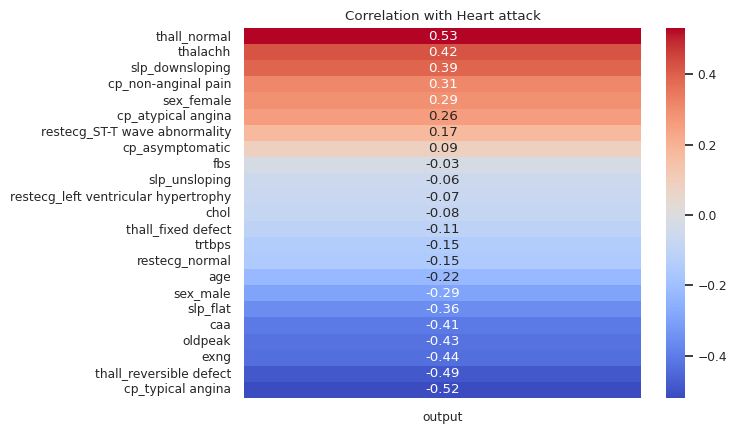

In [121]:
#Graph II
# Create a heatmap of the correlations with the target column
sns.set(font_scale=0.8)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
sns.heatmap(target_corr_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
plt.title('Correlation with Heart attack')
plt.show()

# Predictive Analysis

In [122]:
categorical_columns = ['sex','cp','restecg','slp','thall']
numerical_columns = ['age','trtbps','chol','fbs','thalachh','exng','oldpeak','caa']

In [123]:
X = data.drop('output', axis=1)
y = data['output']

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(), categorical_columns)])

# fit and transform training data
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [133]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)
    train_acc = accuracy_score(y_train, train_preds)
    test_acc = accuracy_score(y_test, test_preds)
    return train_acc, test_acc, test_preds

In [126]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [134]:
models = [
    LogisticRegression(),
    SVC(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    KNeighborsClassifier(),
    GaussianNB(),
    XGBClassifier(use_label_encoder=False, eval_metric='logloss')
]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


In [135]:
model_names = ["Logistic Regression", "SVC", "Decision Trees", "Random Forest", "Gradient Boosting", "KNN", "Naive Bayes", "XGBoost"]

train_results = []
test_results = []

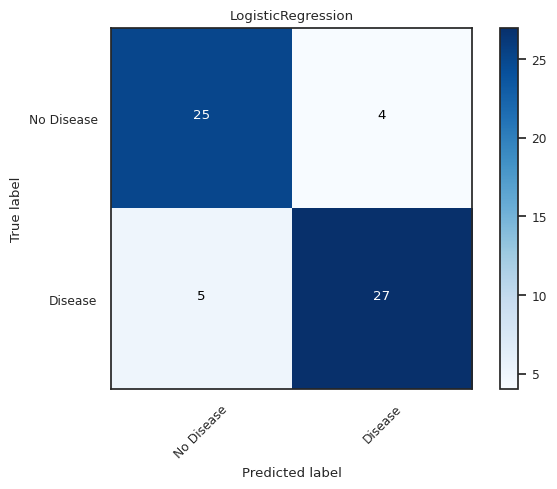

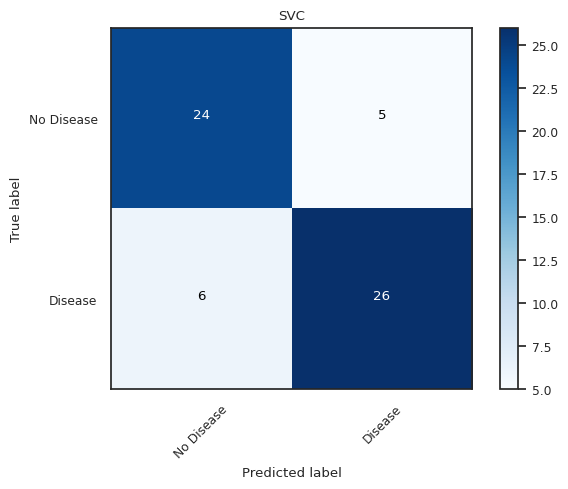

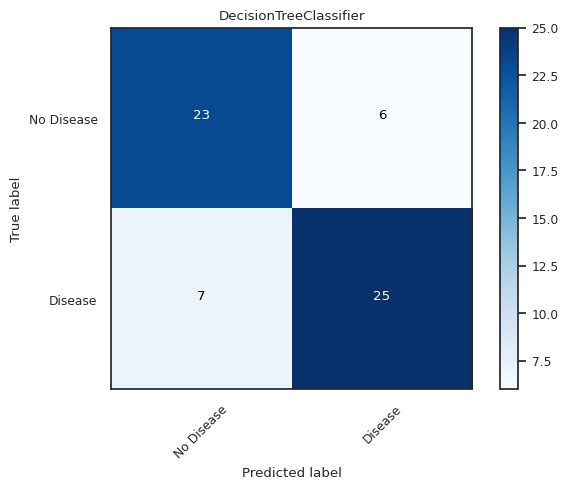

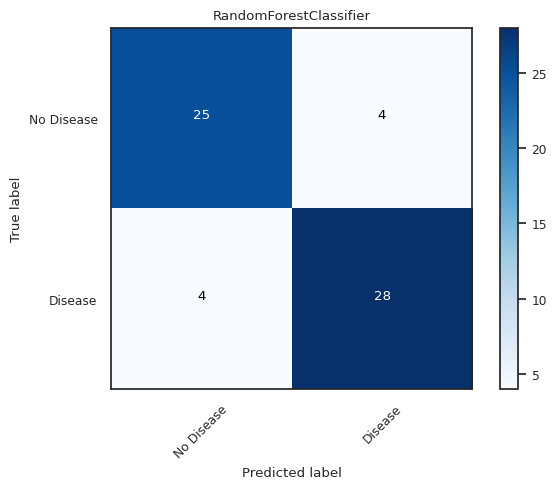

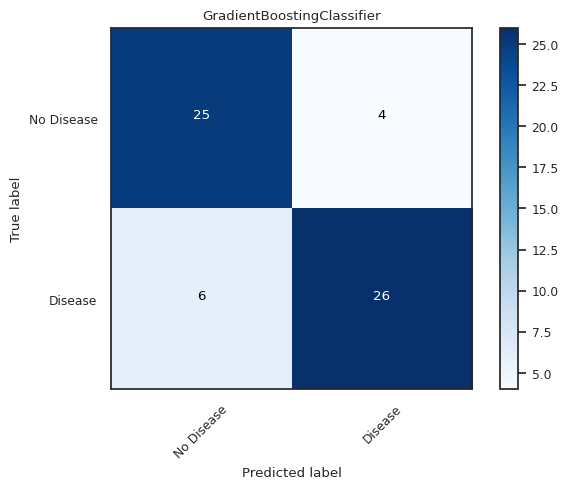

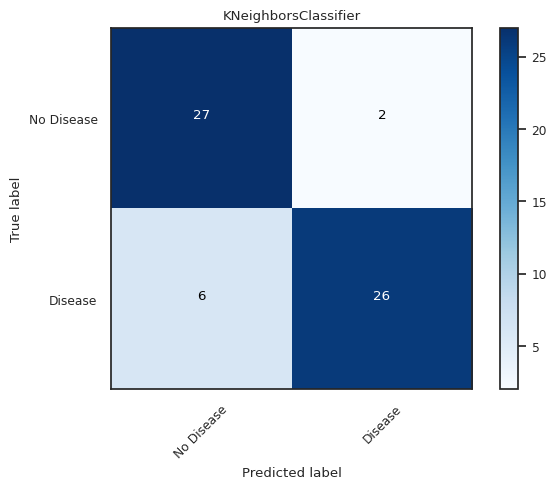

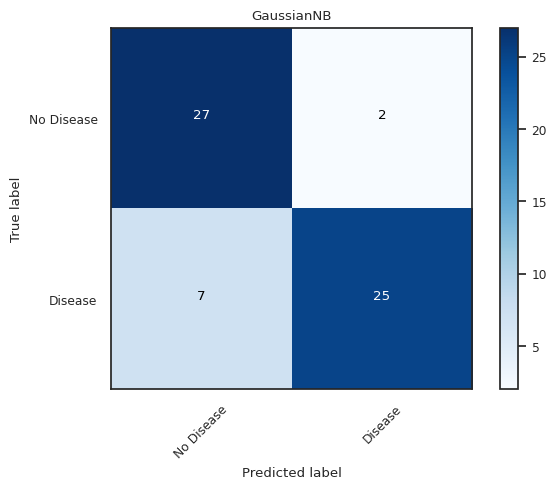

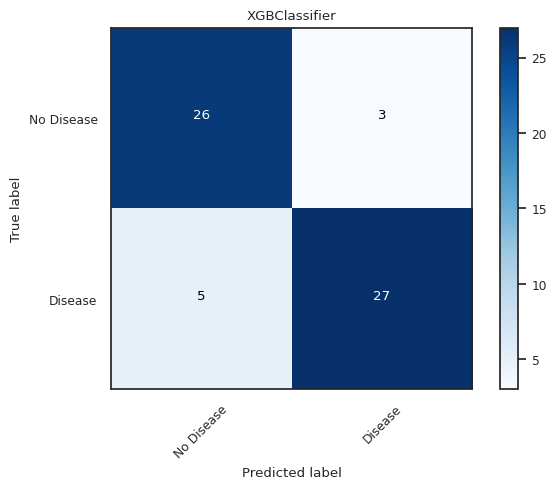

In [136]:
for model in models:
    train_acc, test_acc, y_pred = evaluate_model(model, X_train, y_train, X_test, y_test)
    train_results.append(train_acc)
    test_results.append(test_acc)
    cm = confusion_matrix(y_test, y_pred)
    plot_confusion_matrix(cm, classes=['No Disease', 'Disease'], title=model.__class__.__name__)
    plt.show()

# **Model Comparison**

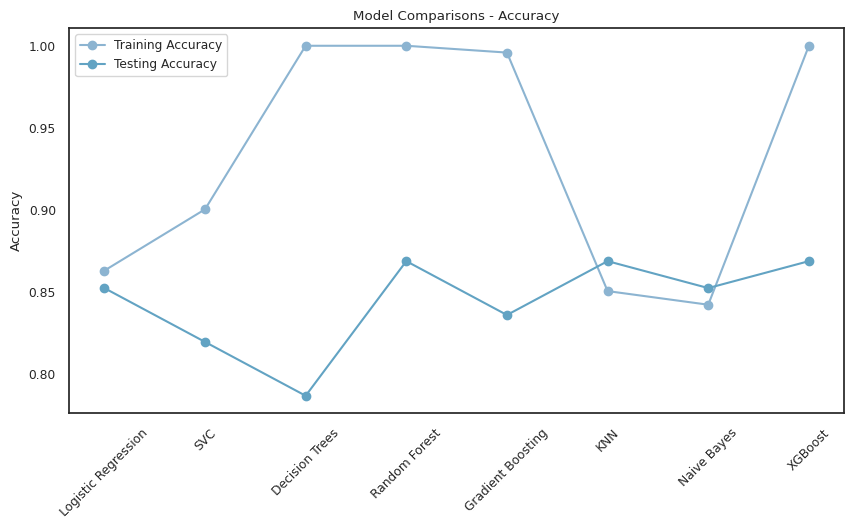

In [137]:
plt.figure(figsize=(10,5))
plt.plot(model_names, train_results, 'o-', label="Training Accuracy")
plt.plot(model_names, test_results, 'o-', label="Testing Accuracy")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.legend()
plt.title("Model Comparisons - Accuracy")
plt.show()